# **YOLO V3 OBJECT DETECTOR**

In [3]:
!git clone https://github.com/pjreddie/darknet
!cd darknet
!make

Cloning into 'darknet'...
remote: Enumerating objects: 5910, done.
remote: Total 5910 (delta 0), reused 0 (delta 0), pack-reused 5910
Receiving objects: 100% (5910/5910), 6.33 MiB | 13.35 MiB/s, done.
Resolving deltas: 100% (3916/3916), done.
make: *** No targets specified and no makefile found.  Stop.


In [4]:
! wget https://pjreddie.com/media/files/yolov3.weights

--2020-08-05 03:46:16--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   325KB/s    in 12m 28s 

2020-08-05 03:58:46 (324 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [13]:

! ./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights ./darknet/data/horses.jpg

/bin/sh: 1: ./darknet: Permission denied


In [ ]:
!git clone https://github.com/pjreddie/darknet

In [14]:
import os
import re
import cv2 # opencv library
import numpy as np
from os.path import isfile, join
import matplotlib.pyplot as plt
import zipfile
import skimage.io as skio
import skimage.transform as sktr

In [48]:
# get file names of the frames
img_dir = '../input/fames-1/frames'
col_frames = os.listdir(img_dir)


# empty list to store the frames
col_images=[]

for idx,item in enumerate(col_frames):
    #print(idx,item)
    col_images.append(sktr.resize(skio.imread(img_dir+'/'+str(item)),(224,224)))
    # read the frames
    #img = cv2.imread('../input/fames-1/frames'+item)
    # append the frames to the list
    #col_images.append(img)

print((col_images))

[array([[[0.68591437, 0.71336535, 0.76042417],
        [0.82309924, 0.85055022, 0.89760904],
        [0.8197479 , 0.85      , 0.89565826],
        ...,
        [0.91806723, 0.91806723, 0.91806723],
        [0.91806723, 0.91806723, 0.91806723],
        [0.77045818, 0.77045818, 0.77045818]],

       [[0.70640256, 0.73385354, 0.78091236],
        [0.847509  , 0.87495998, 0.92201881],
        [0.84327731, 0.87352941, 0.91918768],
        ...,
        [0.94383754, 0.94383754, 0.94383754],
        [0.94383754, 0.94383754, 0.94383754],
        [0.79310724, 0.79310724, 0.79310724]],

       [[0.74484794, 0.77229892, 0.81935774],
        [0.89369748, 0.92114846, 0.96820728],
        [0.88781513, 0.91806723, 0.96372549],
        ...,
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.83557423, 0.83557423, 0.83557423]],

       ...,

       [[0.36014406, 0.35622249, 0.37516006],
        [0.44483794, 0.4410064 , 0.4557623 ],
        [0.41136455, 

In [42]:
import skimage.io as skio
import skimage.transform as sktr

img_dir = '../input/fames-1/frames'

i = 0
col_images = []

for filename in os.listdir(img_dir):
    if(i>=116):
        filepath = os.path.join(img_dir,filename)
        col_images.append(sktr.resize(skio.imread(filepath),(224,224)))
    else:
        i = i+1
        
col_img_arr = np.array(col_images)
print(col_img_arr.shape)

(0,)


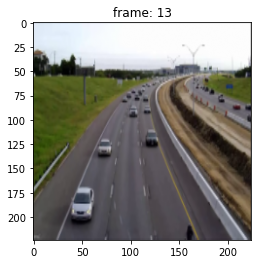

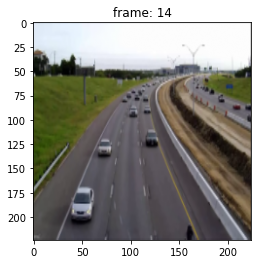

In [51]:
# plot 13th frame
i = 13

for frame in [i, i+1]:
    plt.imshow(col_images[i])
    plt.title("frame: "+str(frame))
    plt.show()

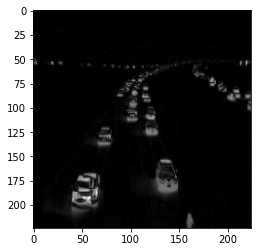

In [53]:
# convert the frames to grayscale
from skimage.color import rgb2gray

grayA = rgb2gray(col_images[i])
grayB = rgb2gray(col_images[i+1])

# plot the image after frame differencing
plt.imshow(cv2.absdiff(grayB, grayA), cmap = 'gray')
plt.show()

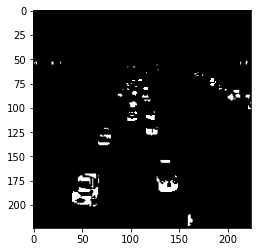

In [64]:
diff_image = cv2.absdiff(grayB, grayA)

# perform image thresholding
ret, thresh = cv2.threshold(diff_image,60/255,1, cv2.THRESH_BINARY)

# plot image after thresholding
plt.imshow(thresh, cmap = 'gray')
plt.show()

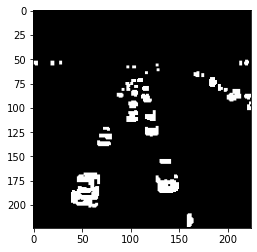

In [77]:
# apply image dilation
kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(thresh,kernel,iterations = 1)

# plot dilated image
plt.imshow(dilated, cmap = 'gray')
plt.show()

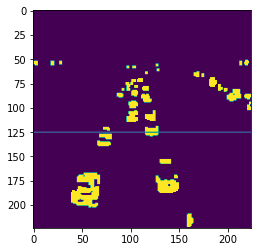

In [78]:
# plot vehicle detection zone
#plt.imshow(dilated)
dil = (cv2.line(dilated,(0,125),(256,125),(100/255,0,0)))
plt.imshow(dil)
plt.show()

In [82]:
# find contours
thresh = cv2.convertScaleAbs(thresh)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

In [83]:
valid_cntrs = []

for i,cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)
    if (x <= 200) & (y >= 80) & (cv2.contourArea(cntr) >= 25):
        valid_cntrs.append(cntr)

# count of discovered contours        
len(valid_cntrs)

8

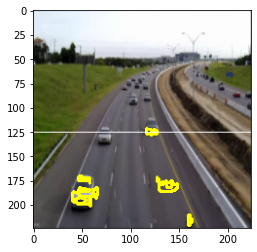

In [87]:
dmy = col_images[13].copy()

cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
cv2.line(dmy, (0,125),(256,125),(100, 255, 255))
plt.imshow(dmy)
plt.show()

In [99]:
# kernel for image dilation
kernel = np.ones((4,4),np.uint8)

# font style
font = cv2.FONT_HERSHEY_SIMPLEX

# directory to save the ouput frames
pathIn = "../input/output/"

frame_out = []

for i in range(len(col_images)-1):
    
    # frame differencing
    grayA = rgb2gray(col_images[i])
    grayB = rgb2gray(col_images[i])
    diff_image = cv2.absdiff(grayB, grayA)
    
    diff_image = cv2.convertScaleAbs(diff_image)
    
    # image thresholding
    ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)
    
    # image dilation
    dilated = cv2.dilate(thresh,kernel,iterations = 1)
    
    # find contours
    contours, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    
    # shortlist contours appearing in the detection zone
    valid_cntrs = []
    for cntr in contours:
        x,y,w,h = cv2.boundingRect(cntr)
        if (x <= 200) & (y >= 125) & (cv2.contourArea(cntr) >= 25):
            if (y >= 90) & (cv2.contourArea(cntr) < 40):
                break
            valid_cntrs.append(cntr)
            
    # add contours to original frames
    dmy = col_images[i].copy()
    cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
    
    cv2.putText(dmy, "vehicles detected: " + str(len(valid_cntrs)), (55, 15), font, 0.6, (0, 180, 0), 2)
    cv2.line(dmy, (0, 125),(256,125),(100, 255, 255))
    cv2.imwrite(pathIn+str(i)+'.png',dmy)  

In [100]:
# specify video name
pathOut = 'vehicle_detection.mp4'

# specify frames per second
fps = 14.0

In [101]:
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]

for i in range(len(files)):
    filename=pathIn +'/'+str(files[i])
    
    #read frames
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)

FileNotFoundError: [Errno 2] No such file or directory: '../input/frames-1'

In [98]:
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, (224,224))

for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])

out.release()